# Capstone Final Year Project
Name- Shivangi Chaurasia

Registration Number- 19BCE0607

### Estimating BMI values from face-images using Keras and Transfer learning

flow of the complete project
1. Mounted g-drive for dataset and imported necessary libraries
2. defined the dataset directory and other parameters, such as image width, height, batch size, and epochs.
3. loaded the pre-trained VGG16 model,
4. frozen the layers of the pre-trained model - so that pre-trained layers are not trained again and new layers can be added
5. built the model by adding a flatten layer, a dense layer with 256 neurons, a dropout layer, and a dense layer with num_classes (5) neurons
6. compiled the model by specifying the optimizer, loss function, and metrics
7. loaded the data and labels from CSV files
8. used ImageDataGenerator class (from Keras to perform data augmentation and ) to generate batches of images and their labels on the fly during training and validation.
9. saved the model and its weights
10. used ImageDataGenerator to generate batches of images for testing and predicted their BMI values.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import os
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt

- batch_size: an integer variable that defines the number of samples processed in each batch during training.
- epochs: an integer variable that defines the number of epochs to train the model for
- number of classes is 5, which represents the different BMI categories.

In [ ]:
# Define the dataset directory and other parameters
data_dir = '/content/drive/MyDrive/finalBMI/check'
img_width, img_height = 224, 224
batch_size =32
epochs = 20

# Define the number of classes and train/val/test samples
num_classes = 5

freezes the layers in the pre-trained VGG16 model so that they are not trainable. This is because we want to use the features extracted by the pre-trained model instead of retraining the entire model.

**Loading the model & using tranfer learning**

In [ ]:
# Load the pre-trained model
base_model = VGG16(
    weights='imagenet',
    include_top=False,   # removes the final fully connected layers of the model, which will be replaced with new layers
    input_shape=(img_width, img_height, 3))
print('Model loaded.')

# Freeze the layers
for layer in base_model.layers:
    layer.trainable = False

58889256/58889256 [==============================] - 0s 0us/step
Model loaded.


Building the neural network model using Keras Sequential API
- first layer of model is pre-trained VGG16 model
- then adding flatten layer to convert the output of the VGG16 model into a 1-dimensional array
- Next adding Dense layer with 256 nodes and a ReLU activation function.
- then adding a dropout layer to prevent overfittting.
- at the end adding another dense layer with 5 node(one for each BMI category) and a linear activation function.


In [ ]:
# Build the model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='linear'))

# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='mean_squared_error', metrics=['mae'])


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


**Splitting of dataset into training, testing and validation data sets in an 80:20:10 ratio**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/finalBMI/finalBMI_dataset.csv')
print(f"Number of samples in dataset: {len(data)}")

# Split the data into training and testing sets (80:20)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Split the training data into training and validation sets (80:10)
train_data, val_data = train_test_split(train_data, test_size=0.1, random_state=42)
# The random_state parameter is used to ensure that the same split is obtained every time the code is run.

# Print the number of samples in each set
print(f"Number of samples in training set: {len(train_data)}")
print(f"Number of samples in validation set: {len(val_data)}")
print(f"Number of samples in testing set: {len(test_data)}")

# Save the split datasets to CSV files
train_data.to_csv('/content/drive/MyDrive/finalBMI/train_data.csv', index=False)
val_data.to_csv('/content/drive/MyDrive/finalBMI/val_data.csv', index=False)
test_data.to_csv('/content/drive/MyDrive/finalBMI/test_data.csv', index=False)


Number of samples in dataset: 3860
Number of samples in training set: 2779
Number of samples in validation set: 309
Number of samples in testing set: 772


In [ ]:

# Load the data and labels from CSV
train_data = pd.read_csv( '/content/drive/MyDrive/finalBMI/train_data.csv')
train_data = train_data.sample(frac=1).reset_index(drop=True)  # Shuffle the data
train_labels = train_data['BMI'].values

val_data = pd.read_csv( '/content/drive/MyDrive/finalBMI/val_data.csv')
val_labels = val_data['BMI'].values

test_data = pd.read_csv( '/content/drive/MyDrive/finalBMI/test_data.csv')
test_labels = test_data['BMI'].values

In [ ]:
print(train_data)
print()
print(type(train_labels))
train_labels

                      celeb  height weight     h   w        BMI  round(BMI)
0        Paul Bettany10.jpg  1.57 m  49 kg  1.57  49  19.879103       19.88
1        Logan Lerman19.jpg   1.75m   68kg  1.75  68  22.204082       22.20
2       Peter O Toole14.jpg  1.88 m  77 kg  1.88  77  21.785876       21.79
3      Novak Djokovic15.jpg  1.88 m  77 kg  1.88  77  21.785876       21.79
4          Owen Wilson5.jpg  1.75 m  75 kg  1.75  75  24.489796       24.49
...                     ...     ...    ...   ...  ..        ...         ...
2774          Lucy Liu7.jpg   1.60m   52kg  1.60  52  20.312500       20.31
2775  Lance Henriksen18.jpg   1.80m   75kg  1.80  75  23.148148       23.15
2776     Queen Latifah3.jpg  1.68 m  57 kg  1.68  57  20.195578       20.20
2777      Perez Hilton3.jpg  1.68 m  58 kg  1.68  58  20.549887       20.55
2778     Kim Basinger15.jpg   1.71m   54kg  1.71  54  18.467221       18.47

[2779 rows x 7 columns]

<class 'numpy.ndarray'>


array([19.8791026 , 22.20408163, 21.78587596, ..., 20.19557823,
       20.54988662, 18.46722068])

**Visual analysis of our dataset distribution --> Histogram of training, validation & test data**

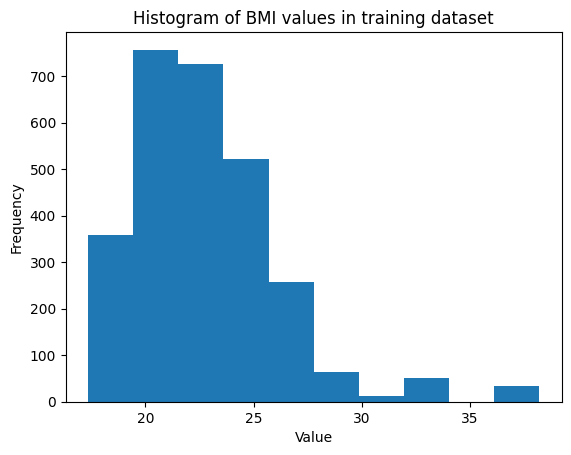

Number of values less than 25: 2205
Number of values more than 25: 564


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# create a numpy array
x = train_labels
y = val_labels
z = test_labels

# convert numpy array to list
x_list = x.tolist()
y_list = y.tolist()
z_list = z.tolist()

if all(isinstance(value, float) for value in x_list):
    # create a histogram of the float values
    plt.hist(x_list, bins=10)
    plt.title("Histogram of BMI values in training dataset")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()
else:
    print("The list contains non-float values.")

# initialize counters
less_than_25 = 0
more_than_25 = 0

# iterate through the list and count values less than 25 and more than 25
for value in x_list:
    if value < 25.0:
        less_than_25 += 1
    elif value > 25.0:
        more_than_25 += 1

# print the results
print("Number of values less than 25:", less_than_25)
print("Number of values more than 25:", more_than_25)


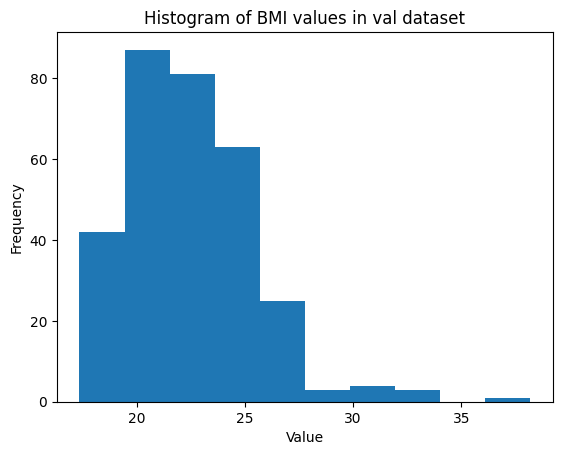

Number of values less than 25: 251
Number of values more than 25: 52


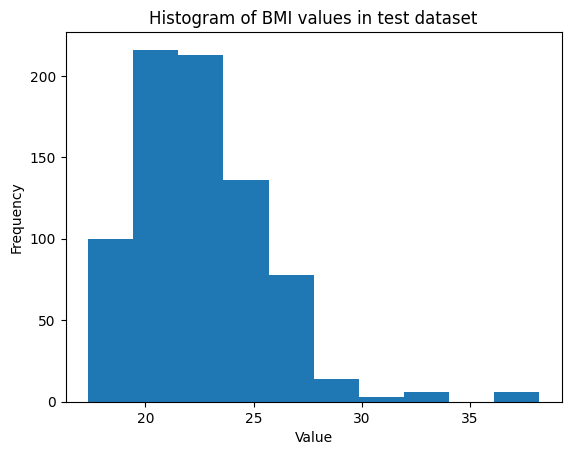

Number of values less than 25: 624
Number of values more than 25: 144


In [ ]:
less_than_25 = 0
more_than_25 = 0
if all(isinstance(value, float) for value in y_list):
    # create a histogram of the float values
    plt.hist(y_list, bins=10)
    plt.title("Histogram of BMI values in val dataset")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()
else:
    print("The list contains non-float values.")

for value in y_list:
    if value < 25.0:
        less_than_25 += 1
    elif value > 25.0:
        more_than_25 += 1

print("Number of values less than 25:", less_than_25)
print("Number of values more than 25:", more_than_25)


# ------test dataset-----------------
less_than_25 = 0
more_than_25 = 0
if all(isinstance(value, float) for value in z_list):
    # create a histogram of the float values
    plt.hist(z_list, bins=10)
    plt.title("Histogram of BMI values in test dataset")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()
else:
    print("The list contains non-float values.")

  

for value in z_list:
    if value < 25.0:
        less_than_25 += 1
    elif value > 25.0:
        more_than_25 += 1

print("Number of values less than 25:", less_than_25)
print("Number of values more than 25:", more_than_25)

**data augmentation technique on the existing dataset before training the model**

To increase amount of training data by applying several image augmentation techniques such as rotation, zoom, and horizontal flip, using the rotation_range, zoom_range, and horizontal_flip arguments in order to increase the range of data.

It also helps in preventing overfitting and improving the model's ability to generalize new data

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Define the data generator for training data with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

# Generate augmented data on the fly during training
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_data,
    directory=data_dir,
    x_col='celeb',
    y_col='BMI',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='other'
)

# Define the data generator for validation and test data without augmentation
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Define the data generator for validation and test data without augmentation
validation_generator = val_datagen.flow_from_dataframe(
    dataframe=val_data,
    directory=data_dir,
    x_col='celeb',
    y_col='BMI',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='other'
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_data,
    directory=data_dir,
    x_col='celeb',
    y_col='BMI',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='other'
)

Found 2779 validated image filenames.
Found 309 validated image filenames.
Found 772 validated image filenames.


- model_checkpoint -> used during training to save best model weights
- early_stopping -> stops training if val_loss stops improving

In [ ]:
# Train the model
model_checkpoint = ModelCheckpoint('model.h5', save_best_only=True, save_weights_only=False, monitor='val_loss', mode='min', verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=3, verbose=1)


**Training the model**

taining the model for 2 epoch

In [ ]:
# Define the number of epochs and batch size
epochs = 2
batch_size = 32

# Train the model, skipping images that give an error
VALIDATION_LOSS = []
MAE = []

for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")
    for i in range(train_data.shape[0] // batch_size):
        try:
            x_batch, y_batch = train_generator.next()
            history = model.train_on_batch(x_batch, y_batch)
        except:
            continue  # skip the image if there is an error during training
        
        if i % 50 == 0:
            print(f"Step {i}/{train_data.shape[0] // batch_size}: loss = {history[0]}, mae = {history[1]}")

    # Evaluate the model on the validation set and track validation loss
    val_loss, val_mae = model.evaluate(validation_generator, steps=val_data.shape[0] // batch_size)
    print(f"Validation loss = {val_loss}, validation mae = {val_mae}")
    VALIDATION_LOSS.append(val_loss)
    MAE.append(val_mae)

# Save the model and its weights
model.save('model.h5')
model.save_weights('model_weights.h5')

print(VALIDATION_LOSS)
print(MAE)

Epoch 1/2
Step 0/86: loss = 567.985595703125, mae = 23.429929733276367
Step 50/86: loss = 54.17329788208008, mae = 5.600927352905273


/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


9/9 [==============================] - 85s 9s/step - loss: 16.0401 - mae: 3.1566
Validation loss = 16.04012107849121, validation mae = 3.1566381454467773
Epoch 2/2
Step 0/86: loss = 47.386558532714844, mae = 5.333141326904297
Step 50/86: loss = 49.909568786621094, mae = 5.887604713439941
9/9 [==============================] - 85s 9s/step - loss: 15.0186 - mae: 2.9584
Validation loss = 15.018620491027832, validation mae = 2.958399772644043
[16.04012107849121, 15.018620491027832]
[3.1566381454467773, 2.958399772644043]


training the model initally for 8 epoch with graph plots

Epoch 1/8
Step 0/86: loss = 533.2415771484375, mae = 22.78662109375
Step 50/86: loss = 44.623199462890625, mae = 5.44143009185791
4/9 [============>.................] - ETA: 47s - loss: 15.6463 - mae: 2.8165

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


9/9 [==============================] - 82s 9s/step - loss: 13.2174 - mae: 2.8424
Validation loss = 13.217408180236816, validation mae = 2.8423585891723633


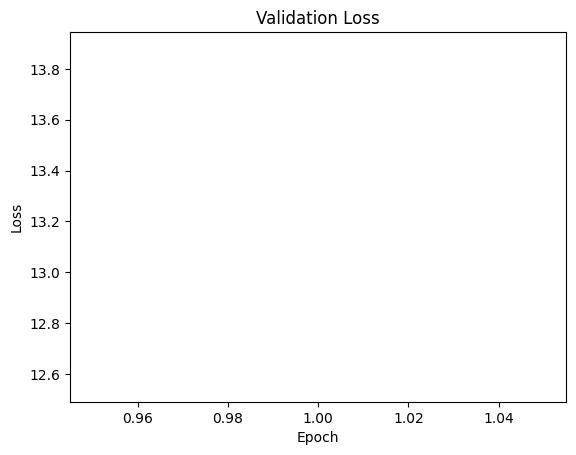

Epoch 2/8
Step 0/86: loss = 29.786651611328125, mae = 4.314110279083252
Step 50/86: loss = 88.76652526855469, mae = 7.231741905212402
9/9 [==============================] - 84s 9s/step - loss: 11.7887 - mae: 2.8394
Validation loss = 11.788714408874512, validation mae = 2.839400291442871


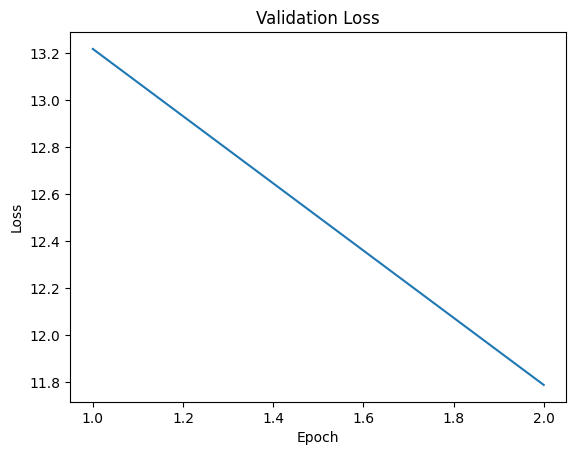

Epoch 3/8
Step 0/86: loss = 36.89936065673828, mae = 4.828863143920898
Step 50/86: loss = 38.17351150512695, mae = 4.713993072509766
9/9 [==============================] - 84s 9s/step - loss: 10.9833 - mae: 2.5361
Validation loss = 10.983345985412598, validation mae = 2.536083221435547


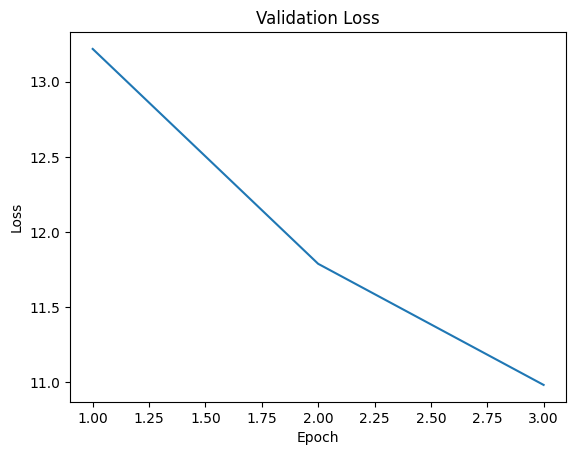

Epoch 4/8
Step 0/86: loss = 44.82955551147461, mae = 5.087801933288574
Step 50/86: loss = 17.721317291259766, mae = 3.308277130126953
9/9 [==============================] - 83s 9s/step - loss: 10.6286 - mae: 2.4156
Validation loss = 10.628582000732422, validation mae = 2.415585517883301


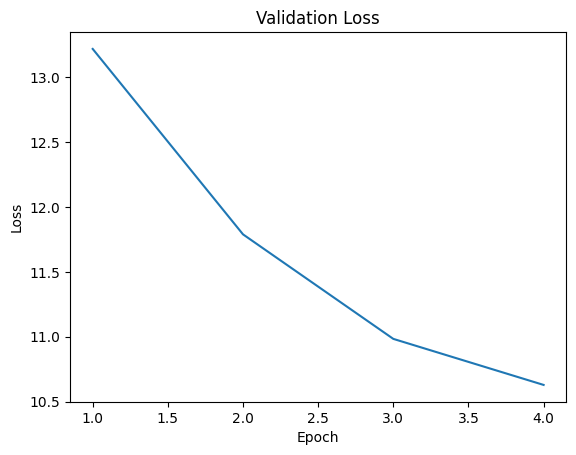

Epoch 5/8
Step 0/86: loss = 28.03347396850586, mae = 4.1643877029418945
Step 50/86: loss = 23.386716842651367, mae = 3.8377676010131836
9/9 [==============================] - 83s 9s/step - loss: 9.3037 - mae: 2.3268
Validation loss = 9.303740501403809, validation mae = 2.3267881870269775


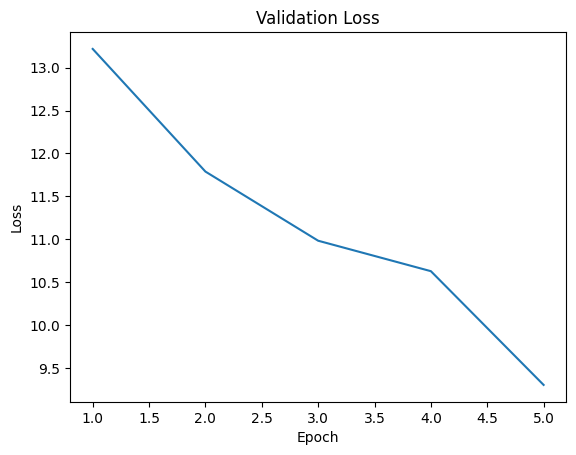

Epoch 6/8
Step 0/86: loss = 27.945674896240234, mae = 4.36913537979126
Step 50/86: loss = 26.103378295898438, mae = 3.9979915618896484
9/9 [==============================] - 81s 9s/step - loss: 8.9389 - mae: 2.2468
Validation loss = 8.93887710571289, validation mae = 2.2467589378356934


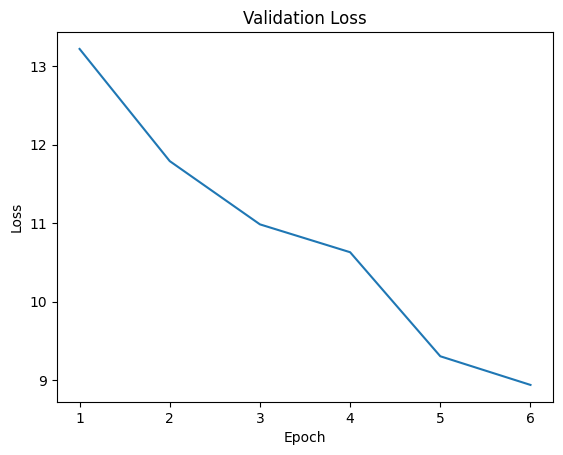

Epoch 7/8
Step 0/86: loss = 34.35418701171875, mae = 4.66219425201416
Step 50/86: loss = 32.713890075683594, mae = 4.612877368927002
9/9 [==============================] - 81s 9s/step - loss: 7.5555 - mae: 2.1596
Validation loss = 7.555509090423584, validation mae = 2.1596193313598633


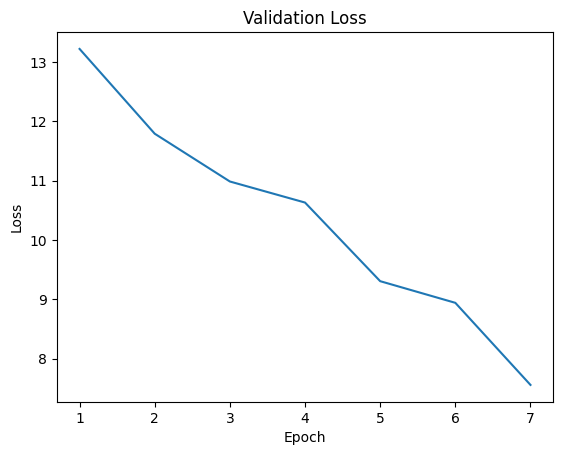

Epoch 8/8
Step 0/86: loss = 24.33502197265625, mae = 3.8991482257843018
Step 50/86: loss = 30.544189453125, mae = 4.40468168258667
9/9 [==============================] - 81s 9s/step - loss: 10.2104 - mae: 2.4608
Validation loss = 10.21044921875, validation mae = 2.460810661315918


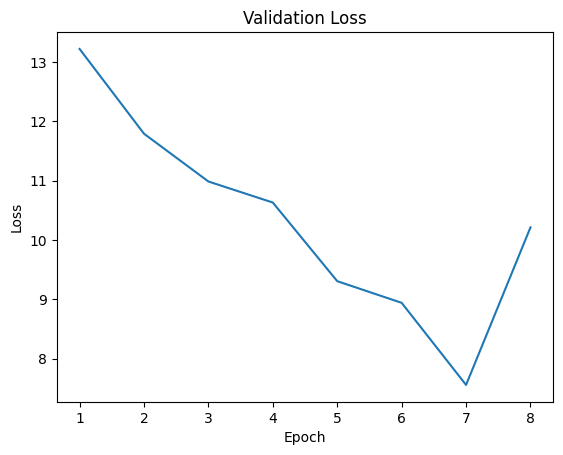

In [ ]:
# Define the number of epochs and batch size
epochs = 8
batch_size = 32

# Train the model, skipping images that give an error

for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")
    for i in range(train_data.shape[0] // batch_size):
        try:
            x_batch, y_batch = train_generator.next()
            history = model.train_on_batch(x_batch, y_batch)
        except:
            continue  # skip the image if there is an error during training
        
        if i % 50 == 0:
            print(f"Step {i}/{train_data.shape[0] // batch_size}: loss = {history[0]}, mae = {history[1]}")

    # Evaluate the model on the validation set and track validation loss
    val_loss, val_mae = model.evaluate(validation_generator, steps=val_data.shape[0] // batch_size)
    print(f"Validation loss = {val_loss}, validation mae = {val_mae}")
    VALIDATION_LOSS.append(val_loss)

    # Plot the loss curve after each epoch
    plt.plot(range(1, epoch+2), VALIDATION_LOSS)
    plt.title('Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()

# Save the model and its weights
model.save('model.h5')
model.save_weights('model_weights.h5')


training the model for 20 epoch

In [ ]:
# Define the number of epochs and batch size
epochs = 20
batch_size = 32

# Train the model, skipping images that give an error
VALIDATION_LOSS = []
MAE = []

for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")
    for i in range(train_data.shape[0] // batch_size):
        try:
            x_batch, y_batch = train_generator.next()
            history = model.train_on_batch(x_batch, y_batch)
        except:
            continue  # skip the image if there is an error during training
        
        if i % 50 == 0:
            print(f"Step {i}/{train_data.shape[0] // batch_size}: loss = {history[0]}, mae = {history[1]}")

    # Evaluate the model on the validation set and track validation loss
    val_loss, val_mae = model.evaluate(validation_generator, steps=val_data.shape[0] // batch_size)
    print(f"Validation loss = {val_loss}, validation mae = {val_mae}")
    VALIDATION_LOSS.append(val_loss)
    MAE.append(val_mae)

# Save the model and its weights
model.save('model.h5')
model.save_weights('model_weights.h5')

print(VALIDATION_LOSS)
print(MAE)

Epoch 1/20
Step 0/86: loss = 18.876455307006836, mae = 3.5886764526367188
Step 50/86: loss = 18.597631454467773, mae = 3.6053788661956787
6/9 [===================>..........] - ETA: 27s - loss: 6.9261 - mae: 1.9168

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


9/9 [==============================] - 82s 9s/step - loss: 7.2892 - mae: 2.0234
Validation loss = 7.289186954498291, validation mae = 2.023408889770508
Epoch 2/20
Step 0/86: loss = 29.25348663330078, mae = 4.428476333618164
Step 50/86: loss = 24.163257598876953, mae = 4.065309524536133
9/9 [==============================] - 81s 9s/step - loss: 9.1594 - mae: 2.2752
Validation loss = 9.159415245056152, validation mae = 2.275193214416504
Epoch 3/20
Step 50/86: loss = 38.44382095336914, mae = 5.221250534057617
9/9 [==============================] - 82s 9s/step - loss: 8.0710 - mae: 2.3251
Validation loss = 8.071039199829102, validation mae = 2.3250837326049805
Epoch 4/20
Step 0/86: loss = 22.800321578979492, mae = 3.9338502883911133
Step 50/86: loss = 39.01426696777344, mae = 4.878283977508545
9/9 [==============================] - 81s 9s/step - loss: 9.8174 - mae: 2.5010
Validation loss = 9.817440032958984, validation mae = 2.5009896755218506
Epoch 5/20
Step 0/86: loss = 19.20174789428711

FileNotFoundError: ignored

In [ ]:
# VALIDATION_LOSS = [7.289186954498291, 9.159415245056152, 8.071039199829102, 9.817440032958984, 8.105438232421875, 6.814844131469727, 8.430276870727539, 6.404290199279785, 10.108624458312988, 6.547427654266357, 7.521901607513428, 7.467382431030273, 10.716798782348633, 7.510563373565674, 9.532302856445312, 8.255176544189453, 8.197772026062012, 7.716272830963135]
# MAE = [2.023408889770508, 2.275193214416504, 2.3250837326049805, 2.5009896755218506, 2.1917884349823, 2.0580434799194336, 2.216578722000122, 1.9947198629379272, 2.4824631214141846, 1.9794409275054932, 2.084327220916748, 2.1365742683410645, 2.575404405593872, 2.1203815937042236, 2.3579893112182617, 2.1926395893096924, 2.172213554382324, 2.092038869857788]

In [ ]:
print(VALIDATION_LOSS)
print(MAE)

[7.289186954498291, 9.159415245056152, 8.071039199829102, 9.817440032958984, 8.105438232421875, 6.814844131469727, 8.430276870727539, 6.404290199279785, 10.108624458312988, 6.547427654266357, 7.521901607513428, 7.467382431030273, 10.716798782348633, 7.510563373565674, 9.532302856445312, 8.255176544189453, 8.197772026062012, 7.716272830963135]
[2.023408889770508, 2.275193214416504, 2.3250837326049805, 2.5009896755218506, 2.1917884349823, 2.0580434799194336, 2.216578722000122, 1.9947198629379272, 2.4824631214141846, 1.9794409275054932, 2.084327220916748, 2.1365742683410645, 2.575404405593872, 2.1203815937042236, 2.3579893112182617, 2.1926395893096924, 2.172213554382324, 2.092038869857788]


**Plot the validation loss and mae over epochs after training the model**

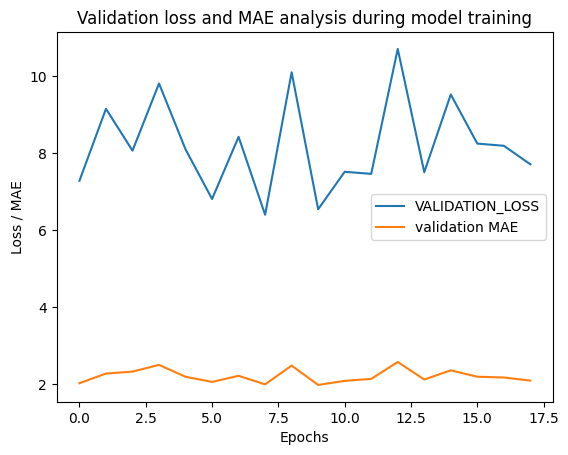

In [ ]:
import matplotlib.pyplot as plt

plt.plot(VALIDATION_LOSS, label='VALIDATION_LOSS')
plt.plot(MAE, label='validation MAE')
plt.title("Validation loss and MAE analysis during model training")
plt.xlabel('Epochs')
plt.ylabel('Loss / MAE')
plt.legend()
plt.show()

**Model Loading & Model Summary**

In [ ]:
import tensorflow as tf

# Load the model from the h5 file
model = tf.keras.models.load_model('/content/drive/MyDrive/finalBMI/model.h5')

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 21,138,757
Trainable params: 6,424,069
Non-trainable params: 14,714,688
_________________________________________________________________


**Visualizing the model architecture**

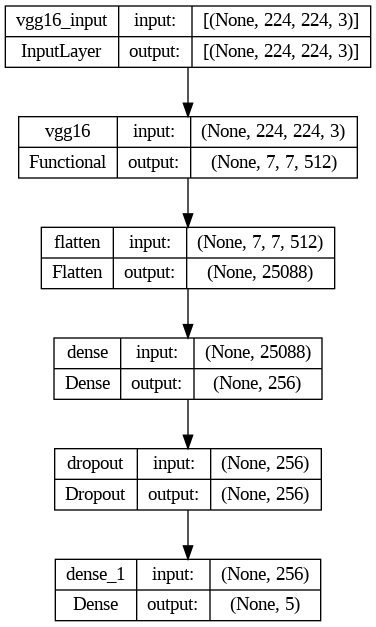

In [ ]:
from tensorflow.keras.utils import plot_model

# Visualize the model architecture
plot_model(model, to_file='model.png', show_shapes=True)

In [ ]:
# Load the test data
test_datagen = image.ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_data,
    directory=data_dir,
    x_col='celeb',
    y_col='BMI',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='other')

# Load the trained model
model = load_model('/content/drive/MyDrive/finalBMI/model.h5')

Found 772 validated image filenames.


**Evaluating model on the test data**

Evaluating the trained model on the test data -> when range is 3(difference between predicted and actual value)

In [ ]:
print(test_data.shape[0], batch_size)

num_steps = test_data.shape[0] // batch_size
print(num_steps)

loss3 = []
mae3 = []

# Evaluate the model on the test data
correct_predictions = 0
test_loss, test_mae = 0, 0
for i in range(num_steps):
    try:
        x_batch, y_batch = test_generator.next()
        predictions = model.predict(x_batch)
        y_batch = y_batch.reshape(-1, 1)  # Reshape y_batch to have the same shape as predictions
        abs_diff = np.abs(predictions - y_batch)
        correct_predictions += np.sum(abs_diff <= 3)
        loss, mae = model.evaluate(x_batch, y_batch, verbose=0)
        test_loss += loss
        test_mae += mae
    except (OSError, FileNotFoundError):
        continue  # skip the image if there is an error or file not found
    print(f"Step {i}/{num_steps}: loss = {loss}, mae = {mae}")
    loss3.append(loss)
    mae3.append(mae)

test_loss /= num_steps
test_mae /= num_steps

print(f"Test loss = {test_loss}, test mae = {test_mae}")
print(loss3)
print(mae3)

772 32
24
1/1 [==============================] - 22s 22s/step
Step 0/24: loss = 10.584693908691406, mae = 2.4484219551086426
1/1 [==============================] - 20s 20s/step
Step 1/24: loss = 9.403926849365234, mae = 2.528151512145996
1/1 [==============================] - 22s 22s/step
Step 2/24: loss = 9.363142967224121, mae = 2.303544521331787
1/1 [==============================] - 19s 19s/step
Step 3/24: loss = 5.628240585327148, mae = 1.887237787246704
1/1 [==============================] - 20s 20s/step
Step 4/24: loss = 9.491469383239746, mae = 2.5223498344421387
1/1 [==============================] - 19s 19s/step
Step 5/24: loss = 7.574310779571533, mae = 2.0995917320251465
1/1 [==============================] - 19s 19s/step
Step 6/24: loss = 6.019251823425293, mae = 1.9092938899993896
1/1 [==============================] - 20s 20s/step
Step 7/24: loss = 8.351805686950684, mae = 2.4018940925598145
1/1 [==============================] - 19s 19s/step
Step 8/24: loss = 8.85761451

**plotting the test loss and test mae on test data to evaluate model performance**

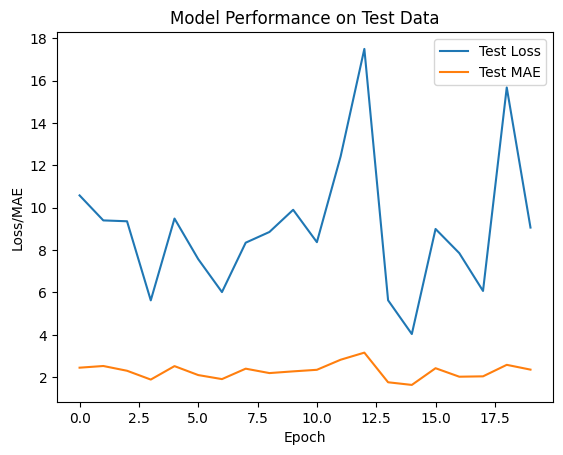

In [ ]:
import matplotlib.pyplot as plt

# Plot the test loss and test MAE

plt.plot(loss3, label='Test Loss')
plt.plot(mae3, label='Test MAE')
plt.title('Model Performance on Test Data')
plt.ylabel('Loss/MAE')
plt.xlabel('Epoch')
plt.legend()
plt.show()

Evaluate model on the test data -> when range is 2

In [ ]:
print(test_data.shape[0], batch_size)

num_steps = test_data.shape[0] // batch_size
print(num_steps)

loss2 = []
mae2 = []

# Evaluate the model on the test data
correct_predictions = 0
test_loss, test_mae = 0, 0
for i in range(num_steps):
    try:
        x_batch, y_batch = test_generator.next()
        predictions = model.predict(x_batch)
        y_batch = y_batch.reshape(-1, 1)  # Reshape y_batch to have the same shape as predictions
        abs_diff = np.abs(predictions - y_batch)
        correct_predictions += np.sum(abs_diff <= 2)
        loss, mae = model.evaluate(x_batch, y_batch, verbose=0)
        test_loss += loss
        test_mae += mae
    except (OSError, FileNotFoundError):
        continue  # skip the image if there is an error or file not found
    print(f"Step {i}/{num_steps}: loss = {loss}, mae = {mae}")
    loss2.append(loss)
    mae2.append(mae)

test_loss /= num_steps
test_mae /= num_steps

print(f"Test loss = {test_loss}, test mae = {test_mae}")
print(loss2)
print(mae2)

772 32
24
1/1 [==============================] - 2s 2s/step
Step 0/24: loss = 35.557228088378906, mae = 4.135880947113037
1/1 [==============================] - 22s 22s/step
Step 1/24: loss = 7.52531623840332, mae = 2.2086024284362793


/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


1/1 [==============================] - 20s 20s/step
Step 2/24: loss = 6.873255729675293, mae = 2.0534520149230957
1/1 [==============================] - 21s 21s/step
Step 3/24: loss = 13.192817687988281, mae = 2.575723171234131
1/1 [==============================] - 20s 20s/step
Step 4/24: loss = 14.429073333740234, mae = 2.3688502311706543
1/1 [==============================] - 19s 19s/step
Step 5/24: loss = 9.84088134765625, mae = 2.6857831478118896
1/1 [==============================] - 21s 21s/step
Step 7/24: loss = 8.568219184875488, mae = 2.2790944576263428
1/1 [==============================] - 21s 21s/step
Step 8/24: loss = 6.889387130737305, mae = 2.0868539810180664
1/1 [==============================] - 21s 21s/step
Step 9/24: loss = 9.002655029296875, mae = 2.4193966388702393
1/1 [==============================] - 20s 20s/step
Step 10/24: loss = 8.30030632019043, mae = 2.183873176574707
1/1 [==============================] - 19s 19s/step
Step 11/24: loss = 10.620576858520508

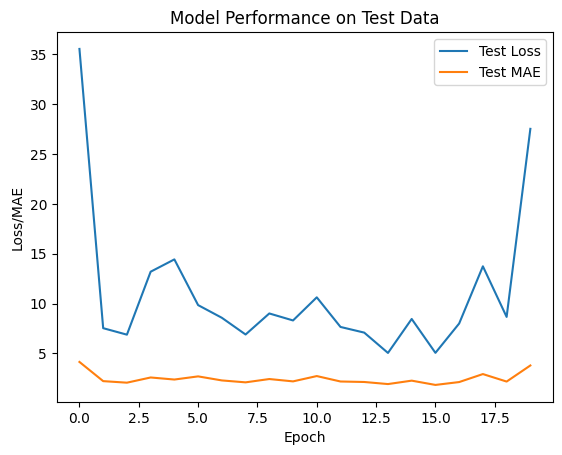

In [ ]:
plt.plot(loss2, label='Test Loss')
plt.plot(mae2, label='Test MAE')
plt.title('Model Performance on Test Data')
plt.ylabel('Loss/MAE')
plt.xlabel('Epoch')
plt.legend()
plt.show()

Evaluate model on the test data -> when range is 1

In [ ]:
print(test_data.shape[0], batch_size)

num_steps = test_data.shape[0] // batch_size
print(num_steps)

loss1 = []
mae1 = []

# Evaluate the model on the test data
correct_predictions = 0
test_loss, test_mae = 0, 0
for i in range(num_steps):
    try:
        x_batch, y_batch = test_generator.next()
        predictions = model.predict(x_batch)
        y_batch = y_batch.reshape(-1, 1)  # Reshape y_batch to have the same shape as predictions
        abs_diff = np.abs(predictions - y_batch)
        correct_predictions += np.sum(abs_diff <= 1)
        loss, mae = model.evaluate(x_batch, y_batch, verbose=0)
        test_loss += loss
        test_mae += mae
    except (OSError, FileNotFoundError):
        continue  # skip the image if there is an error or file not found
    print(f"Step {i}/{num_steps}: loss = {loss}, mae = {mae}")
    loss1.append(loss)
    mae1.append(mae)

test_loss /= num_steps
test_mae /= num_steps

print(f"Test loss = {test_loss}, test mae = {test_mae}")
print(loss1)
print(mae1)

772 32
24
1/1 [==============================] - 22s 22s/step
Step 0/24: loss = 6.487836837768555, mae = 1.9478510618209839
1/1 [==============================] - 2s 2s/step
Step 1/24: loss = 16.518062591552734, mae = 3.5656628608703613
1/1 [==============================] - 20s 20s/step
Step 4/24: loss = 6.5547285079956055, mae = 2.255280017852783
1/1 [==============================] - 22s 22s/step
Step 5/24: loss = 6.812780380249023, mae = 2.0338823795318604
1/1 [==============================] - 19s 19s/step
Step 6/24: loss = 8.050891876220703, mae = 2.264685869216919
1/1 [==============================] - 19s 19s/step
Step 8/24: loss = 8.047554016113281, mae = 2.0331060886383057
1/1 [==============================] - 20s 20s/step
Step 9/24: loss = 13.914852142333984, mae = 2.8436336517333984
1/1 [==============================] - 22s 22s/step
Step 11/24: loss = 9.610231399536133, mae = 2.3552913665771484
1/1 [==============================] - 19s 19s/step
Step 12/24: loss = 15.4276

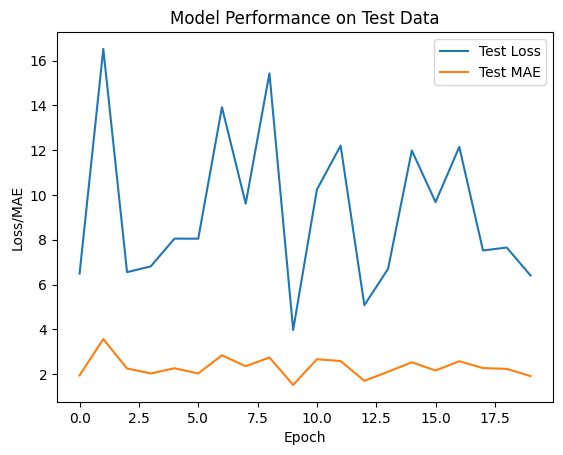

In [ ]:
plt.plot(loss1, label='Test Loss')
plt.plot(mae1, label='Test MAE')
plt.title('Model Performance on Test Data')
plt.ylabel('Loss/MAE')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
# Load the test data
test_datagen = image.ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_data,
    directory=data_dir,
    x_col='celeb',
    y_col='BMI',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='other')

Found 772 validated image filenames.


In [ ]:
# Load the trained model
model = load_model('/content/drive/MyDrive/finalBMI/model.h5')

**Predict on the test set**

In [ ]:
# test_generator.reset()
# pred = model.predict(test_generator, steps=test_data.shape[0] // batch_size, verbose=1)

test_generator.reset()

# Predict the model on the test dataset, skipping images that give an error
pred = []
for i in range(test_data.shape[0] // batch_size):
    try:
        x_batch, y_batch = test_generator.next()
        batch_pred = model.predict_on_batch(x_batch)
        pred.append(batch_pred)
    except:
        continue  # skip the image if there is an error during prediction

# Concatenate the predictions into a single numpy array
pred = np.concatenate(pred, axis=0)

In [ ]:
print(pred)

[[21.68173  21.63412  21.484312 21.770746 21.73907 ]
 [23.079597 23.045559 23.392464 23.288507 23.478989]
 [17.826982 17.812563 17.981775 17.948893 18.256338]
 ...
 [23.992136 23.512781 23.7525   23.614141 23.375914]
 [18.88965  18.807772 19.247198 18.990156 18.968966]
 [22.13714  21.720545 22.069197 22.124968 21.861341]]


In [ ]:
pred_df = pd.DataFrame({'BMI_pred': pred.reshape(-1)})
pred_df.to_csv('predictions.csv', index=False)

**Save the predictions to a CSV file**

In [ ]:
print(pred_df)

       BMI_pred
0     21.681730
1     21.634121
2     21.484312
3     21.770746
4     21.739071
...         ...
3195  22.137140
3196  21.720545
3197  22.069197
3198  22.124968
3199  21.861341

[3200 rows x 1 columns]


In [ ]:
print(type(test_labels))
print(len(test_labels))

print(type(test_data))
print(len(test_data))

print(type(pred))
print(len(pred))

<class 'numpy.ndarray'>
772
<class 'pandas.core.frame.DataFrame'>
772
<class 'numpy.ndarray'>
640


**Predict BMI of test images**

In [ ]:
from keras.utils import load_img, img_to_array, array_to_img

# Make predictions on new images
new_image_path = '/content/drive/MyDrive/finalBMI/test_images/Kriti.jpg'
new_image = load_img(new_image_path, target_size=(img_width, img_height))
new_image = img_to_array(new_image)
new_image = np.expand_dims(new_image, axis=0)
new_bmi = model.predict(new_image)
print(f"BMI of new image: {new_bmi}")


import tensorflow as tf
img_path = '/content/drive/MyDrive/finalBMI/test_images/Kriti.jpg'
img = tf.keras.utils.load_img(img_path, target_size=(img_width, img_height))
x = tf.keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0  # Normalize the pixel values
preds = model.predict(x)

print(img_path[43:])
print('Predicted BMI:', preds[0][0])

1/1 [==============================] - 1s 762ms/step
BMI of new image: [[153.43546 149.27695 163.2813  145.28487 144.4425 ]]
1/1 [==============================] - 1s 579ms/step
/Kriti.jpg
Predicted BMI: 15.838518


In [ ]:
from keras.utils import load_img, img_to_array, array_to_img

def predict_bmi(image_path):
    img = load_img(image_path, target_size=(img_width, img_height))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0
    prediction = model.predict(x)
    # print(prediction)
    return prediction[0][0]

def rangeBMI(bmi_pred):
  if bmi_pred < 15:
    print("Very severely underweight")
  elif 15 <= bmi_pred < 16:
    print("Severely underweight")
  elif 16 <= bmi_pred < 18.5:
    print("Underweight")
  elif 18.5 <= bmi_pred < 25:
    print("Normal")
  elif 25 <= bmi_pred < 30:
    print("Overweight")
  elif 30 <= bmi_pred < 35:
    print("Moderately obese")
  elif 35 <= bmi_pred < 40:
    print("Severely obese")
  elif bmi_pred >= 40:
    print("Very severely obese")

# Example usage-1:
image_path = '/content/drive/MyDrive/finalBMI/test_images/MaheshBabu.jpg'
predicted_bmi = predict_bmi(image_path)
print(image_path[43:])
print(f"Predicted BMI: {predicted_bmi}")
# BMI_range = rangeBMI(predicted_bmi)
rangeBMI(predicted_bmi)
# print(BMI_range)

# Example usage-2:
image_path = '/content/drive/MyDrive/finalBMI/test_images/Prabhas.jpg'
predicted_bmi = predict_bmi(image_path)
print(image_path[43:])
print(f"Predicted BMI: {predicted_bmi}")
rangeBMI(predicted_bmi)

# Example usage-3:
image_path = '/content/drive/MyDrive/finalBMI/test_images/Rajnikant.jpg'
predicted_bmi = predict_bmi(image_path)
print(image_path[43:])
print(f"Predicted BMI: {predicted_bmi}")
rangeBMI(predicted_bmi)

# Example usage-4:
image_path = '/content/drive/MyDrive/finalBMI/test_images/akshay1.jpeg'
predicted_bmi = predict_bmi(image_path)
print(image_path[43:])
print(f"Predicted BMI: {predicted_bmi}")
rangeBMI(predicted_bmi)

# Example usage-5:
image_path = '/content/drive/MyDrive/finalBMI/test_images/Kriti.jpg'
predicted_bmi = predict_bmi(image_path)
print(image_path[43:])
print(f"Predicted BMI: {predicted_bmi}")
rangeBMI(predicted_bmi)

# # Example usage-6:
# image_path = '/content/ericstonestreet.jpg'
# predicted_bmi = predict_bmi(image_path)
# print(image_path[8:])
# print(f"Predicted BMI: {predicted_bmi}")
# rangeBMI(predicted_bmi)

1/1 [==============================] - 1s 545ms/step
/MaheshBabu.jpg
Predicted BMI: 19.23877716064453
Normal
1/1 [==============================] - 1s 556ms/step
/Prabhas.jpg
Predicted BMI: 24.15624237060547
Normal
1/1 [==============================] - 1s 563ms/step
/Rajnikant.jpg
Predicted BMI: 21.65300941467285
Normal
1/1 [==============================] - 1s 586ms/step
/akshay1.jpeg
Predicted BMI: 26.301239013671875
Overweight
1/1 [==============================] - 1s 568ms/step
/Kriti.jpg
Predicted BMI: 15.838518142700195
Severely underweight
